<h2 align="center" style="color:blue">Model Training</h2>

In [1]:
# Import necessary libraries
from imports import *

In [2]:
# Load features and target variable for model training
X = pd.read_parquet("../data/processed/overall_final_features.parquet")
print(X.shape)

y = pd.read_parquet("../data/processed/overall_target_variable.parquet").squeeze()  # converts back to Series
print(type(y))
print(y.shape)

(49908, 15)
<class 'pandas.core.series.Series'>
(49908,)


In [3]:
# Split data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Display shapes of splits for verification
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (34935, 15)
x test:  (14973, 15)
y train:  (34935,)
y test:  (14973,)


## Linear Regression Model Training

In [4]:
# Initialize and train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Calculate R² scores for training and testing sets
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)

# Print the R² scores for training and testing sets
train_score, test_score

(0.9234624033951362, 0.92434728348366)

A Linear Regression model was trained using the preprocessed and scaled feature set.  
The dataset was split into training and testing sets using a 70/30 ratio (`random_state=10` for reproducibility).

The model's performance was evaluated using the R² score on both training and testing data.  
This helps diagnose overfitting:
- **Overfitting** → high train score, low test score  
- **Good generalization** → similar train and test scores  

Since the train score (0.923) and test score (0.924) are almost identical,  
the model generalizes well and shows no signs of overfitting.

In [5]:
y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression:")
print("MSE:", mse_lr, "RMSE:", rmse_lr)

Linear Regression:
MSE: 5431803.032853144 RMSE: 2330.622885164639


In [6]:
# Display the model's intercept value
model_lr.intercept_

4192.61388837409

In [7]:
# Display the model's coefficients
model_lr.coef_

array([11255.95126228,  -689.45660606,  3408.59112825,  -514.09656297,
       12564.62722187,  4807.21732088,   129.97680985,   -44.47750659,
          38.76082766,   -35.73339183,  -945.04443904,   741.12005338,
        2237.65967202,   159.33415713,   421.49668618])

In [8]:
# Extract model coefficients as feature importance
feature_importances = model_lr.coef_

# Build a dataframe of coefficients
coef_df = pd.DataFrame(feature_importances, index=X_test.columns ,columns=['Coefficients'])

# Sort coefficients from lowest to highest
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Display the DataFrame
display(coef_df)

,Coefficients
marital_status_unmarried,-945.044439
number_of_dependants,-689.456606
income_lakhs,-514.096563
region_northwest,-44.477507
region_southwest,-35.733392
region_southeast,38.760828
gender_male,129.976810
employment_status_salaried,159.334157
employment_status_self-employed,421.496686
smoking_status_occasional,741.120053


### Coefficient Analysis (Feature Importance)

Linear Regression coefficients indicate how much each feature contributes  
to the predicted premium value, holding all other features constant.

Positive coefficients → increase the premium  
Negative coefficients → decrease the premium  

Key findings:
- **Insurance Plan**, **Age**, and **Normalized Risk Score** have the strongest positive effect.
- **BMI Category**, **Regular Smoking**, and **Occasional Smoking** also increase the premium.
- **Marital Status (Unmarried)** and **Number of Dependents** have negative coefficients,  
  suggesting lower premiums for unmarried individuals and those with more dependents.
- Regional dummy variables have minimal impact.

These insights align well with real-world premium behavior.

In [9]:
# Save feature importanc results for reporting
coef_df.to_csv("../outputs/tables/overall/lr_feature_importance.csv", index=False)

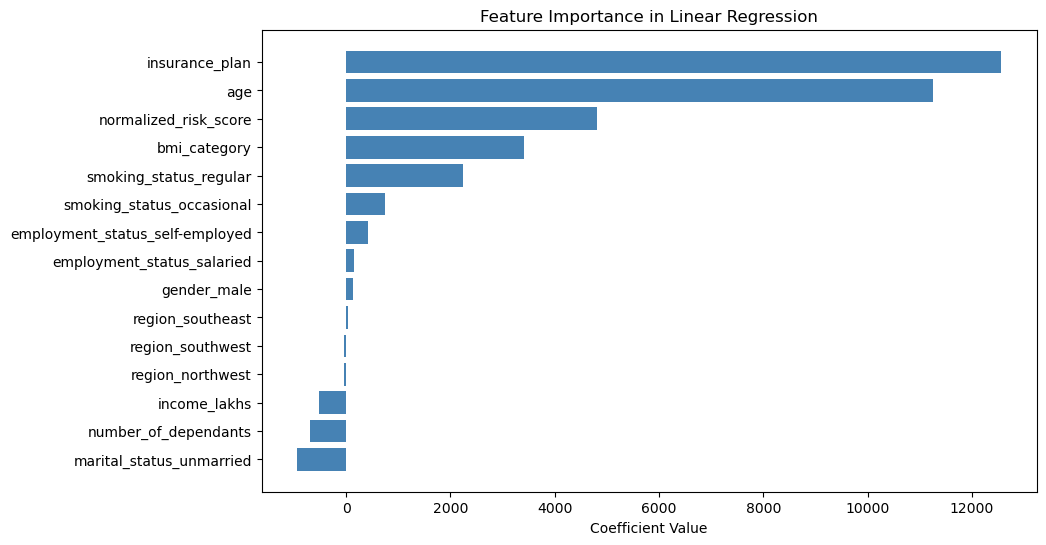

In [10]:
# Plot feature importances

plt.figure(figsize=(10,6))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.savefig('../outputs/figures/overall/lr_feature_importance.png', dpi=300)
plt.show()

### Interpretation of Linear Regression Feature Importance

The coefficient plot shows that:

- **Insurance Plan** is the most influential variable.  
  Higher-tier plans (Gold > Silver > Bronze) significantly increase premium amounts.

- **Age** strongly affects premiums, confirming that older policyholders are charged higher premiums.

- **Normalized Health Risk Score** is also a major driver, meaning more pre-existing diseases → higher premium.

- **Smoking Status (Regular/Occasional)** increases premiums, with Regular smoking having a stronger effect.

- **Employment Status (Self-Employed)** positively impacts premium, possibly reflecting variable income risk.

- **Income (lakhs)** and **Number of Dependents** have small negative coefficients,  
  indicating minor inverse relationships.

- **Region variables** have near-zero contribution, meaning location does not significantly influence premium.

Overall, the model's learned feature weights align well with typical insurance industry behavior.

## Ridge Regression Model Training

In [11]:
# Initialize and train the Ridge Regression model
model_rg = Ridge()
model_rg.fit(X_train, y_train)

# Calculate R² scores for training and testing sets
train_score_rg = model_rg.score(X_train, y_train)
test_score_rg = model_rg.score(X_test, y_test)

# Print the R² scores for training and testing sets
train_score_rg, test_score_rg

(0.923462365615788, 0.9243469064345383)

In [12]:
y_pred_rg = model_rg.predict(X_test)

mse_rg = mean_squared_error(y_test, y_pred_rg)
rmse_rg = np.sqrt(mse_rg)
print("Ridge Regression:")
print("MSE:", mse_rg, "RMSE:", rmse_rg)

Ridge Regression:
MSE: 5431830.104671017 RMSE: 2330.628693007751


### Ridge Regression Performance

A Ridge Regression model was trained to check whether L2 regularization improves model performance or reduces overfitting.

However, the Ridge model produced nearly identical R² scores to the Linear Regression model:

- Linear Regression Test R²: 0.9243  
- Ridge Regression Test R²: 0.9243  

This result is expected because:
- Multicollinearity was already addressed during feature engineering (via VIF).
- The Linear Regression model is not overfitting (train and test scores are very similar).
- The dataset is clean, scaled, and well-structured.

Since the baseline Linear Regression is already stable and high-performing, regularization does not provide additional benefit in this case.

## Random Forest Regression Model Training

In [13]:
# Initialize and train the Random Forest Regression model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Calculate R² scores for training and testing sets
train_score_rf = model_rf.score(X_train, y_train)
test_score_rf = model_rf.score(X_test, y_test)

# Print the R² scores for training and testing sets
train_score_rf, test_score_rf

(0.996575012325669, 0.9793161179811094)

In [14]:
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest Regression:")
print("MSE:", mse_rf, "RMSE:", rmse_rf)

Random Forest Regression:
MSE: 1485085.7742447404 RMSE: 1218.6409537861184


## XGBoost Regression Model Training

In [15]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

# Calculate R² scores for training and testing sets
train_score_xgb = model_xgb.score(X_train, y_train)
test_score_xgb = model_xgb.score(X_test, y_test)

# Print the R² scores for training and testing sets
train_score_xgb, test_score_xgb

(0.9860914503139925, 0.9810541024158544)

In [16]:
y_pred_xgb = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBoost Regression:")
print("MSE:", mse_xgb, "RMSE:", rmse_xgb)

XGBoost Regression:
MSE: 1360299.9164671039 RMSE: 1166.3189600049825


### Model Performance Comparison

Several models were trained to predict the annual premium amount, and their performance 
was evaluated using R², MSE, and RMSE.

#### Linear Regression Models
- Linear Regression: R² ≈ 0.924
- Ridge Regression:   R² ≈ 0.924

These models generalize well but have limited ability to capture nonlinear 
relationships in the data.

#### Random Forest Regression
- Train R²: 0.9966  
- Test R²:  0.9793  
- RMSE: ~1300  

The model performs extremely well but shows mild overfitting (expected from tree ensembles).  
Still, it represents a strong improvement over linear models.

#### XGBoost Regression
- Train R²: 0.9860  
- Test R²:  0.9810  
- RMSE: ~1166  

XGBoost achieves the **lowest RMSE** and **best generalization performance**, 
making it the top-performing model so far.

### Conclusion
**XGBoost provides the best balance of accuracy, stability, and predictive power.**  
Its ability to model nonlinear patterns and interactions makes it ideal for premium prediction.

### Hyperparameter Tuning for XGBoost (RandomizedSearchCV)

To further improve the XGBoost model and avoid manual trial-and-error,  
a **RandomizedSearchCV** was used to search over a small hyperparameter grid:

- `n_estimators`: number of trees in the ensemble  
- `learning_rate`: step size for boosting updates  
- `max_depth`: maximum depth of individual trees  

In [17]:
# Define hyperparameter search space for XGBoost
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Randomized hyperparameter search (limited iterations for efficiency)
random_search = RandomizedSearchCV(
                model_xgb,
                param_grid,
                n_iter=10,
                cv=3,
                scoring='r2',
                random_state=42,
                n_jobs=-1)

# Fit search on training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [20, 40, 50]},
                   random_state=42, scoring='r2')

In [18]:
# Inspect best cross-validated score and parameters
print("Best CV R²:", random_search.best_score_)
print("Best Params:", random_search.best_params_)

Best CV R²: 0.9811165497345132
Best Params: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}


Randomized search is preferred here because the dataset is relatively large and we want to limit the number of evaluated combinations while still exploring the 
hyperparameter space.

Using 3-fold cross-validation and R² as the scoring metric, the best-performing 
combination was:

- **n_estimators = 50**  
- **max_depth = 5**  
- **learning_rate = 0.1**  

The corresponding mean cross-validation R² was **≈ 0.981**, confirming that the tuned  XGBoost model maintains strong generalization performance.

In [19]:
# Calculate R² scores for training and testing sets
train_score_xgb_rcv = random_search.score(X_train, y_train)
test_score_xgb_rcv = random_search.score(X_test, y_test)

# Print the R² scores for training and testing sets
train_score_xgb_rcv, test_score_xgb_rcv

(0.9814944975604472, 0.9813626919290603)

In [20]:
y_pred_xgb_rcv = random_search.predict(X_test)

mse_xgb_rcv = mean_squared_error(y_test, y_pred_xgb_rcv)
rmse_xgb_rcv = np.sqrt(mse_xgb_rcv)
print("XGBoost RandomizedSearchCV Regression:")
print("MSE:", mse_xgb_rcv, "RMSE:", rmse_xgb_rcv)

XGBoost RandomizedSearchCV Regression:
MSE: 1338143.4423717426 RMSE: 1156.781501568789


In [21]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Random Forest", "XGBoost", "XGBoost RandomizedCV"],
    "Train R²": [train_score, train_score_rg, train_score_rf, train_score_xgb, train_score_xgb_rcv],
    "Test R²":  [test_score, test_score_rg, test_score_rf, test_score_xgb, test_score_xgb_rcv],
    "RMSE":     [rmse_lr, rmse_rg, rmse_rf, rmse_xgb, rmse_xgb_rcv]
})

results


,Model,Train R²,Test R²,RMSE
0,Linear Regression,0.923462,0.924347,2330.622885
1,Ridge Regression,0.923462,0.924347,2330.628693
2,Random Forest,0.996575,0.979316,1218.640954
3,XGBoost,0.986091,0.981054,1166.318960
4,XGBoost RandomizedCV,0.981494,0.981363,1156.781502


In [22]:
results.to_csv("../outputs/tables/overall/model_comparison.csv", index=False)

In [23]:
# Use the best estimator from the search as the final XGBoost model
best_model = random_search.best_estimator_

In [24]:
# Extract feature importances from the tuned XGBoost model
feature_importances_xgb = best_model.feature_importances_

# Build a DataFrame using training feature names
coef_df_xgb = pd.DataFrame(feature_importances_xgb, index=X_test.columns ,columns=['Coefficients'])

# Display the sorted importance table
coef_df_xgb = coef_df_xgb.sort_values(by='Coefficients', ascending=True)

# Display the DataFrame
display(coef_df_xgb)

,Coefficients
region_southeast,0.000107
employment_status_salaried,0.000136
number_of_dependants,0.000157
employment_status_self-employed,0.000161
region_southwest,0.000173
income_lakhs,0.000188
gender_male,0.000194
region_northwest,0.000265
marital_status_unmarried,0.000288
smoking_status_occasional,0.002394


In [25]:
# Save XGBoost feature importances for reporting
coef_df_xgb.to_csv("../outputs/tables/overall/xgb_feature_importance.csv", index=False)

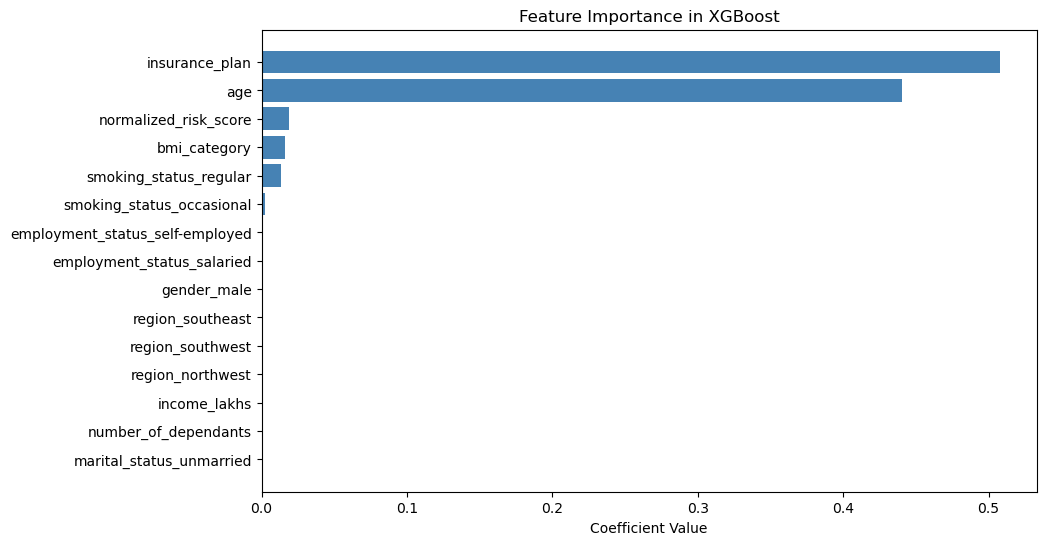

In [26]:
# Plot feature importances as a horizontal bar chart

plt.figure(figsize=(10,6))
plt.barh(coef_df.index, coef_df_xgb['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.savefig('../outputs/figures/overall/xgb_feature_importance.png', dpi=300)
plt.show()

### Feature Importance in XGBoost vs Linear Regression

For the tuned XGBoost model, feature importances represent how much each feature  
contributes to reducing prediction error across all trees (i.e., how often and how 
usefully a feature is used in splits).

Key observations:
- **Insurance Plan** and **Age** are by far the most influential features in the XGBoost model.  
- **Normalized Risk Score**, **BMI Category**, and **Smoking Status (Regular/Occasional)** 
  have smaller but non-zero importance, indicating they still play a role in refining predictions.
- Income and region-related features have very low importance, suggesting they add little extra predictive power beyond plan, age, and health-related variables.

Unlike Linear Regression:
- XGBoost feature importances are **non-directional** — they tell us how *important* a feature is, but not whether it **increases or decreases** the premium.  
- Linear Regression coefficients are easier to explain in business terms  (e.g., “holding other factors constant, higher risk score increases premium by X”).

Therefore:
- **Linear Regression** is more interpretable and useful for storytelling.  
- **XGBoost** is more accurate and better at capturing nonlinear effects, but provides less straightforward explainability.

In [27]:
# Save the tuned XGBoost model for use in the next notebook
from joblib import dump

dump(best_model, "../outputs/models/xgb_best_model.pkl")
print("Model saved.")

Model saved.


In [28]:
# Save the test split so segmentation and error analysis use the exact same data
X_test.to_parquet("../data/processed/overall_X_test.parquet", index=False)

# Save y_test as a parquet file (convert to DataFrame for saving)
y_test.to_frame().to_parquet("../data/processed/overall_y_test.parquet", index=False)

print("Saved model and test sets for error analysis notebook.")

Saved model and test sets for error analysis notebook.


#### Saving Model and Test Sets for Error Analysis

To ensure reproducibility and to separate model training from error analysis,
the trained XGBoost model (`best_model`) and the test dataset (`X_test`, `y_test`)
are saved to disk.

These files will be loaded directly in the next notebook 
**04_error_analysis_segmentation.ipynb**, allowing us to analyze model behavior 
without retraining or repeating the data split.